# Desafio #QuarentenaDados

Bem-vinda e bem-vindo ao desafio #QuarentenaDados valendo um **Nintendo Switch**!

Esse notebook traz informações dos dados e como você deve configurar seu arquivo final para submissão.

**Caso queira usar esse notebook como exemplo para desenvolver seu projeto, clique em file e escolha a opção Save a copy in Drive**


Vamos trabalhar com uma amostra aleatória da base de dados MICRODADOS ENEM 2018, essa amostra é **diferente da apresentada em aula**. Junto com a divulgação do resultado final estaremos disponibilizando o código que gerou os dados para que você possa analisar e reproduzir os datasets. 

Seu objetivo é prever da melhor forma possível a nota das provas de **linguagens e códigos** (NU_NOTA_LC), dado todas as outras notas. O modelo que tiver o menor **erro quadrático médio (MSE)** vence o desafio.

Para o desafio você tem três bases à disposição, duas para desenvolver seu modelo e uma para submissão da predição. As bases são as seguintes:

- **dados_treino**: São 1500000 linhas contendo a nota das 4 provas + nota de redação.

- **dados_teste**: São 20000 linhas contendo com notas das 4 provas + nota de redação.

- **dados_desafioqt**: São 10000 linhas com nota de 3 provas + nota de redação. A nota da prova de **Linguagem e Codigos** (NU_NOTA_LC) não está disponível nessa base.


As base **dados_treino e dados_teste**, contém as seguintes colunas; **NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO, NU_NOTA_LC** (Você pode consultar a aula 5, onde o Guilherme explica o significado das siglas). A coluna que você deve realizar a **previsão** é **NU_NOTA_LC**. Você pode manipular os dados da forma que quiser, o importante é que no final submeta o arquivo com as informações corretas (detalhes da submissão serão discutidos no final deste notebook).

A base **dados_desafioqt**, contém as seguintes colunas; **ID, NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO**. Repare que os dados **NU_NOTA_LC** não estão presentes, essa é justamente a informação que você precisa prever. Nós temos os valores reais das notas, no final do prazo de submissão um script irá avaliar sua previsão e dará uma nota para o seu modelo. Nessa base também temos o **ID**, essa informação é importante para o envio da sua previsão, garanta que a nota prevista corresponda ao respectivo **ID**.

Se você está habituado com o desenvolvimento de modelos de ML, repare que essa divisão de dados é exatamente a mesma que Treino, Teste e Validação. 

Abaixo preparamos um código exemplo para você seguir, sinta-se à vontade para experimentar diversos outros métodos, mas **GARANTA QUE O ARQUIVO DE SUBMISSÃO ESTEJA CONFIGURADO CORRETAMENTE**.

Na primeira parte, estamos lendo a base de dados direto de arquivos no github.






In [0]:
import pandas as pd

URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

Agora com as bases de dados lidas, vamos separar as informações de cada dataset. X_treino e Y_treino são as **features**, X_teste e Y_teste são as **labels** a serem previstas.

Duas observações nesta parte:

- 1° Como já disponibilizamos os dados de treino e teste separados, você não precisa fazer *train_test_split* feito em aula (porém fique à vontade para trabalhar da forma que achar melhor).

- 2° Transformamos X_treino, Y_treino, X_teste, Y_teste em arrays numpy. Se você quiser usar uma biblioteca que não aceite dataframe como entrada de dados, já deixamos pronto para você.

In [2]:
dados_treino

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,530.7,586.5,575.9,539.0,520.0
1,439.4,577.9,440.9,488.7,380.0
2,414.1,548.8,417.2,382.6,600.0
3,407.9,572.7,558.9,595.4,560.0
4,617.2,655.7,564.2,660.9,540.0
...,...,...,...,...,...
149995,587.8,644.1,621.4,714.4,840.0
149996,385.0,525.6,473.2,446.2,520.0
149997,471.0,558.7,582.4,542.9,460.0
149998,476.7,463.5,553.3,434.0,0.0


In [3]:
# substituindo os zeros pela mediana da coluna

#dados_treino.replace(0,dados_treino.mean(axis=0),inplace=True)
dados_treino.replace(0,dados_treino.mean(axis=0),inplace=True)
dados_treino

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,530.7,586.5,575.9,539.0,520.000000
1,439.4,577.9,440.9,488.7,380.000000
2,414.1,548.8,417.2,382.6,600.000000
3,407.9,572.7,558.9,595.4,560.000000
4,617.2,655.7,564.2,660.9,540.000000
...,...,...,...,...,...
149995,587.8,644.1,621.4,714.4,840.000000
149996,385.0,525.6,473.2,446.2,520.000000
149997,471.0,558.7,582.4,542.9,460.000000
149998,476.7,463.5,553.3,434.0,516.269867


In [0]:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']



X_treino = dados_treino[coluna_features].to_numpy()
Y_treino = dados_treino[coluna_label].to_numpy()
X_teste = dados_teste[coluna_features].to_numpy()
Y_teste = dados_teste[coluna_label].to_numpy()


A seguir criamos um modelo **Dummy** como exemplo e realizamos a avaliação do modelo com o **mean_squared_error**. 

Você pode usar qualquer algoritmo ou biblioteca para criar seus modelos, mas garanta que fará a avaliação com o mean_squared_error, pois usaremos essa métrica para avaliar sua predição final.

In [5]:
#Exemplo de classificação com Dummy
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

modelo_dummy = DummyRegressor()
modelo_dummy.fit(X_treino, Y_treino)
dummy_predicoes = modelo_dummy.predict(X_teste)

avaliacao_dummy = mean_squared_error(Y_teste, dummy_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_dummy}")

Minha avaliação nos dados de teste foi de 5219.553345033778


In [6]:
# Verificar a existência de dados faltantes (NaN)
colunas = ['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
for nota in colunas:
  print(f"Verificação isna() para {nota}:")
  print(dados_treino.isna().query(f'{nota} == True'))
  print(f"Verificação 'NaN' para {nota}")
  print(dados_treino.query(f"{nota} == 'NaN'"))
  print()

Verificação isna() para NU_NOTA_CN:
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []
Verificação 'NaN' para NU_NOTA_CN
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []

Verificação isna() para NU_NOTA_CH:
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []
Verificação 'NaN' para NU_NOTA_CH
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []

Verificação isna() para NU_NOTA_LC:
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []
Verificação 'NaN' para NU_NOTA_LC
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []

Verificação isna() para NU_NOTA_MT:
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []
Verificação 'NaN' para NU_NOTA_MT
Empty Data

In [7]:
# Após verificada a inexistência de NaN
# Avaliar as informações disponíveis para treino

dados_treino.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,493.946412,571.349643,528.734791,535.679274,526.825865
std,73.968036,77.220425,71.622089,102.866163,168.599056
min,362.500000,304.200000,318.800000,364.400000,40.000000
25%,435.800000,513.600000,478.000000,455.500000,380.000000
50%,483.600000,584.900000,533.400000,516.800000,520.000000
75%,542.500000,629.600000,581.400000,600.900000,640.000000
max,869.600000,825.800000,787.400000,996.100000,1000.000000


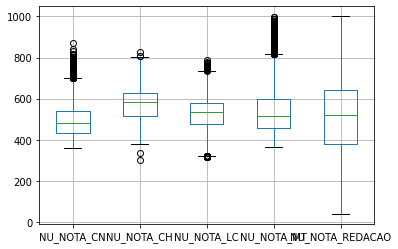

In [8]:
dados_treino.boxplot()

In [9]:
%%time
# Classificação utilizando Linear Regressor (valores default)
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
from sklearn.svm import LinearSVR

modelo_linear = LinearSVR()
modelo_linear.fit(X_treino, Y_treino)

linear_predic = modelo_linear.predict(X_teste)

aval_linear = mean_squared_error(Y_teste, linear_predic)

print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")


Minha avaliação nos dados de teste foi de 5296.537291690569

CPU times: user 15.8 s, sys: 8.35 ms, total: 15.8 s
Wall time: 15.8 s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
%%time
# Classificação utilizando Linear Regressor (alterando valores: C, max_iter)
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
from sklearn.svm import LinearSVR
import pandas as pd

C_list=[0.1,0.25,0.33,0.5,0.75]
max_iter_list=[2000, 5000, 10000]
MSEmin=100000

for C_val in C_list:
  for max_val in max_iter_list:
    modelo_linear = LinearSVR(C= C_val, max_iter= max_val)
    modelo_linear.fit(X_treino, Y_treino)

    linear_predic = modelo_linear.predict(X_teste)

    aval_linear = mean_squared_error(Y_teste, linear_predic)
    if aval_linear < MSEmin:
      print(f"\nMSE: {aval_linear} para C={C_val} e max_iter={max_val}\n")


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



MSE: 2272.4684901194387 para C=0.1 e max_iter=2000



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



MSE: 2190.7544119756976 para C=0.1 e max_iter=5000



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



MSE: 2259.962585369369 para C=0.1 e max_iter=10000



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



MSE: 2634.0785709972906 para C=0.25 e max_iter=2000



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



MSE: 2743.5818654465475 para C=0.25 e max_iter=5000



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



MSE: 2548.1700024559923 para C=0.25 e max_iter=10000



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



MSE: 2196.9296645893155 para C=0.33 e max_iter=2000



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



MSE: 3170.3323593307746 para C=0.33 e max_iter=5000



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



MSE: 2325.6254300905075 para C=0.33 e max_iter=10000



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



MSE: 3680.7807761827157 para C=0.5 e max_iter=2000



In [15]:
%%time
# Classificação utilizando SGD Regressor (default)
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
from sklearn import linear_model

modelo_SGD = linear_model.SGDRegressor()
modelo_SGD.fit(X_treino, Y_treino)

linear_SGD = modelo_SGD.predict(X_teste)

aval_linear = mean_squared_error(Y_teste, linear_SGD)

print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")


Minha avaliação nos dados de teste foi de 7.807722942139572e+27

CPU times: user 12.2 s, sys: 2.86 ms, total: 12.2 s
Wall time: 12.2 s


In [16]:
%%time
# Classificação utilizando ElasticNet Lasso
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
from sklearn.linear_model import ElasticNet

modelo_ENLasso = linear_model.ElasticNet(random_state=0)
modelo_ENLasso.fit(X_treino, Y_treino)

linear_ENL = modelo_ENLasso.predict(X_teste)

aval_linear = mean_squared_error(Y_teste, linear_ENL)

print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")


Minha avaliação nos dados de teste foi de 2177.8649197062614

CPU times: user 30.8 ms, sys: 7.04 ms, total: 37.8 ms
Wall time: 34.9 ms


In [0]:
%%time
# Classificação utilizando SVR kernel="rbf" - if doesn't work -> kernel="linear"
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
#from sklearn.svm import SVR

#modelo_SVR = SVR(C=1.0, epsilon=0.2)
#modelo_SVR.fit(X_treino, Y_treino)

#linear_SVR = modelo_SVR.predict(X_teste)

#aval_linear = mean_squared_error(Y_teste, linear_SVR)

#print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")

In [0]:
%%time
# Classificação utilizando SVR kernel="rbf" - if doesn't work -> kernel="linear"
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
from sklearn.svm import SVR

modelo_SVR = SVR(kernel='linear', C=1.0, epsilon=0.2)
modelo_SVR.fit(X_treino, Y_treino)

linear_SVR = modelo_SVR.predict(X_teste)

aval_linear = mean_squared_error(Y_teste, linear_SVR)

print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")

Depois que você criou testou e validou seu modelo, chegou a hora de preparar seu arquivo para a submissão do resultado.

No código abaixo, estamos realizando a predição das notas de **linguagem e códigos** do dataset **dados_desafioqt**. Feita a previsão, criamos um dataframe novo para a submissão, primeiro crimos a coluna **ID** e adicionamos a coluna **NU_NOTA_LC** com suas respectivas previsões (repare que nosso modelo não alterou as ordens dos ID's, mas se você utilizar algum modelo que embaralhe essa ordem certifique de colocar a previsão correta para o ID correto).

Após isso, salvamos o dataframe com ´.to_csv()´ (**importante, passe o parâmetro index=False para `.to_csv()`, caso contrário nosso script não computará sua nota**) no arquivo **PREDICAO_DESAFIOQT.csv (você precisa submeter o arquivo com esse nome, caso contrário nosso script de avaliação não computará sua nota**)  e utilizamos o `files.download` para baixar o arquivo em sua máquina local.

Feito tudo isso você está quase pronto para finalizar e submeter seu resultado. Você já baixou os dados, treinou e validou seu modelo, salvou sua previsão **no padrão ideal para submissão** e já está com o modelo baixado em sua máquina. Entretanto, ainda falta um detalhe: no momento de preencher o **forms** você precisa enviar seu código. Caso esteja usando os notebooks do colab siga as seguintes instruções para o download:

- Clique em **File** na parte superior esquerda.
- Depois selecione a opção **Download .ipynb** (também aceitaremos o .py caso você prefira desenvolver seu projeto em um arquivo python).


Pronto agora é só submeter seu resultado e torcer para levar um **Nintendo Switch** para casa.

Boa sorte!

In [0]:
#atribuir ao MODELO o nome do seu melhor modelo
from google.colab import files

MODELO = modelo_dummy
X_desafioqt = dados_desafioqt[coluna_features].to_numpy()
predicao_desafioqt = MODELO.predict(X_desafioqt)


desafio_df = pd.DataFrame(dados_desafioqt.ID)
desafio_df[coluna_label] = predicao_desafioqt

#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
files.download('PREDICAO_DESAFIOQT.csv')

